## Your assignment is to construct an optimal stock portfolio for your team.  To achieve this start by selecting a number of publicly traded stocks that you will use to construct your portfolio.  The number of stocks and the specific names are up to you.  Next use Bloomberg (or a reputable alternative) to download daily historical stock price data for all the stocks you have chosen.  The amount of historical data you choose to include is up to you.{-}

We decided to focus on the S&P 500, as it is one of the most comprehensive and liquid markets in the world.  There are 505 constituents within the index from which we have selected our holdings to construct our portfolio.

We began by downloading the last days’ adjusted closing price and beta for all 505 stocks from Bloomberg.  For the purpose of this exercise, we believe taking 5-years’ worth of historical pricing data would be appropriate, from both a computing power and contextual perspectives.   Ideally, we would like to base our analysis on an even longer period, possibly one that covers a full economic cycle, but the current up cycle has lasted for more than 10 years rising from the depth of the Great Recession in 2009.   We believe 5-years’ worth of share price data would be sufficient to reduce skewness and noise from seasonality, extraordinary events, and more importantly, unprecedented tax policy changes and erratic market impacts from Trump tweets.  He was elected at the end of 2016, so we feel we should take a period longer than 3 years.

In deciding how many stocks to hold in our portfolio, we would like to diversify away as much non-systematic risks as we can and in the most efficient way.   We looked into a famous study by Burton Malkiel detailed in his book “Random Walk Down Wall Street” published in 1973.  According to his study, the optima number of holdings for a portfolio is between 20 to 25, where one can diversify away and reduce most of the standard deviation (proxy for risk) of their portfolio’s returns.  As you can see in the chart below, the marginal benefits of diversification reduce dramatically as the number of holdings increase beyond this range. 

![title](portfolioSize.png)
<sub>https://intrinsicinvesting.com/2019/04/22/how-many-stocks-should-you-own-in-your-portfolio/</sub>

Second, we also considered the trading costs involved.  We plan to put our portfolio into action and invest our own money in it later, so if we have more than 25+ holdings, we would pay a lot of commission to move in and out of positions, which is not what we want.

Moreover, having too many holdings also dilutes one’s ability to generate alpha and outperform the market.  For example, your 100th stock would only make up 1% (or less) of your overall portfolio so even it went up 10% it would only have a 0.1% impact (or less) to your overall returns.  Not only is the impact on overall return minimal, you also gain very little diversification benefits as much was already captured with the first 25 holdings.  Given our team favors an active management style, we believe using 25 holdings for our portfolio would be optimal. 

We then proceeded to select our 25 stocks and determined our criteria.   We wanted holdings that would give us the best combination of income and growth.  For income, we used Dividend Yield as an indication.   For growth, we simply calculated to the total cumulative share price appreciation over the past 5 years and used it as a proxy.  

We began by screening for stocks that pay the highest dividend yields with the S&P 500 index.   Dividend yield is calculated by dividing the Dividend dollars into the stock price; as such, we are cognizant not to select stocks that have experienced a decline in stock price (hence a smaller denominator) which then resulted in a high dividend yield.  To avoid these, we made sure we selected stocks that have a positive share price appreciation over the past 5 years.

Next, we filtered for stocks with a history of producing the highest income and growth combination.   We accomplished this by first ranking the Dividend Yield column and then also ranking their 5-year cumulative share price appreciation column.  We then summed the 2 rankings to blend our criteria into one, essentially giving both criteria equal weighting.  Finally, we ranked the resultant column, and selected the 25 stocks with the top scores.

$$\rule{15cm}{0.5pt}$$

In [1]:
# Import required packages
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sco

In [2]:
# Read in filtered stock data from Bloomberg.
df_selected_stocks = pd.read_csv('BloombergData.csv')

# Sort by ticker symbol
df_selected_stocks.sort_values(by=['Ticker'], inplace=True)

# Reset the index
df_selected_stocks = df_selected_stocks.reset_index(drop=True)

# Add in the risk free asset
row = ['R_F', 'Risk Free Asset', 0,0,0,0,0,0]
df_selected_stocks.loc[len(df_selected_stocks)] = row

# Number of stocks to be considered
num_of_stocks = len(df_selected_stocks.index)

df_selected_stocks

,Ticker,Name,Dvd Yld,Change,DY rank,Change Rank,total rank,beta
0,ATVI,ACTIVISION BLIZZARD INC,2.010505,1.533731,223,57,280,0.851930
1,AVGO,BROADCOM INC,3.069135,2.039234,116,30,146,0.979600
2,BA,BOEING CO/THE,2.322856,1.678239,194,48,242,0.982430
3,BBY,BEST BUY CO INC,2.376600,1.302835,187,82,269,1.097770
4,CCI,CROWN CASTLE INTL CORP,3.322014,0.708843,94,197,291,0.684991
5,CME,CME GROUP INC,2.281996,1.320938,199,74,273,0.586603
6,CTAS,CINTAS CORP,1.600187,2.507461,284,19,303,0.960328
7,DLR,DIGITAL REALTY TRUST INC,3.590437,0.724253,78,191,269,0.699076
8,DRI,DARDEN RESTAURANTS INC,2.612034,1.286819,158,83,241,0.772788
9,EXR,EXTRA SPACE STORAGE INC,3.274419,0.808546,96,173,269,0.515145


## From this data calculate the daily historical returns for each of the stocks.  For example if the price of a stock on day $i$ is $S_i$ then the return on stock $i$ can be approximated as: $\frac{S_i - S_{i-1}}{S_{i-1}}$ .  Do this for all stocks and then use Excel or another statistical package to calculate the covariance matrix for this data.  Since you used daily returns to calculate this covariance matrix you will want to convert these covariances to annual values.  To do this multiply your covariance matrix by 252 (the number of trading days in a year).{-}

## Next you will need to estimate the expected returns on all of the stocks you have chosen.  Estimating expected future returns from historical data is extremely unreliable as we will see next class.  Instead, use Bloomberg’s estimate for the betas of all the stocks you have chosen, and then calculate the expected return on each stock according to the CAPM pricing model formula.  Assume that the risk free interest rate is 1.8% and assume that the expected return on the index is 7.8%.{-}

We are now ready to build our Efficient Frontier and have decided to do so with Python. 

This time, we went to Yahoo Finance and downloaded the daily adjusted closing prices for every trading day over the past 5 years.  We uploaded the data table into our notebook and used the the *table.pct_change()* function, which the same as the formula, $(S_i-S_i-_1)/(S_i-_1)$ which calculates the daily returns on stock $i$ for all 25 stocks.  We then used the *daily_returns.cov()* function to generate our co-variance matrix with our 25 stocks, which we multiplied by 252, as instructed to convert to annual values.   Next, we added a risk-free asset as a holding onto our new co-variance matrix, which we represented with a row and a column of zero’s. We decided to include a risk-free asset as part of our portfolio because by doing so we can raise our portfolio’s returns higher for all risk levels (measured by standard deviation) than if we did not (i.e. the portfolio only held stocks (risky assets)). 
Recall that we are not allowed to short any assets. As such, the first part of our Efficient Frontier would consist of our stocks and the risk free asset, which would begin at the y-axis at 1.8% and would look like straight line up to our optimal portfolio (we will explain our methodology of determination later).  All points to the right of our optimal portfolio will contain stocks only.

To estimate the expected return for each stock, we used the following CAPM formula.

$$E(R) = R_F + \beta[E(R_M) - R_F]$$

Where $E(R)$ is expected return, $R_F$ is the risk free rate at 1.8%, $E(R_M)$ is the Expected Market Return at 7.8%, and $\beta$ is each stock’s adjusted Beta, which measures the stock’s volatility in relation to overall index / market


We chose the adjusted Beta listed in Bloomberg, which is derived from the past two years of weekly data, but is modified by the assumption that a security’s beta moves toward the market average over time.

$$\rule{15cm}{0.5pt}$$

In [3]:
# Get stock prices for last 5 years
stock_data = pd.read_csv('FiveYearStockPriceData.csv')

# Pivot data so ticker symbols are columns with only one date occurence
stock_data = stock_data.pivot(index='Date',
                              columns='Ticker',
                              values='Adj_Price')

# Check the data
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1260 entries, 2014-12-05 to 2019-12-06
Data columns (total 25 columns):
ATVI    1260 non-null float64
AVGO    1260 non-null float64
BA      1260 non-null float64
BBY     1260 non-null float64
CCI     1260 non-null float64
CME     1260 non-null float64
CTAS    1260 non-null float64
DLR     1260 non-null float64
DRI     1260 non-null float64
EXR     1260 non-null float64
HD      1260 non-null float64
JPM     1260 non-null float64
LRCX    1260 non-null float64
MAA     1260 non-null float64
MCD     1260 non-null float64
MXIM    1260 non-null float64
NEE     1260 non-null float64
NI      1260 non-null float64
O       1260 non-null float64
OKE     1260 non-null float64
PGR     1260 non-null float64
TDG     1260 non-null float64
TSN     1260 non-null float64
TXN     1260 non-null float64
VLO     1260 non-null float64
dtypes: float64(25)
memory usage: 255.9+ KB


In [4]:
# View the first 5 rows of stock data
stock_data.head()

Ticker,ATVI,AVGO,BA,BBY,CCI,CME,CTAS,DLR,DRI,EXR,...,MXIM,NEE,NI,O,OKE,PGR,TDG,TSN,TXN,VLO
Date,,,,,,,,,,,,,,,,,,,,,
2014-12-05,20.987265,93.190529,115.430206,31.132494,65.225761,71.858963,69.059906,55.697254,44.561852,49.811840,...,26.715969,88.290100,14.202535,36.685860,39.547676,23.770525,155.832840,38.412373,48.781902,41.467335
2014-12-08,20.149313,90.251152,113.745171,31.971312,65.127029,72.396263,69.012634,55.883835,44.599937,49.987816,...,26.502993,88.924866,14.097228,36.653610,36.413990,23.787966,154.003983,38.098808,48.343063,40.076202
2014-12-09,20.197470,91.980721,113.203835,32.032795,64.978935,72.111343,69.400238,56.200260,44.089733,50.230835,...,26.443357,89.714012,14.229707,36.718102,36.474251,23.395565,155.061523,37.997345,48.281620,40.476048
2014-12-10,19.735155,88.942780,108.820984,31.619982,63.736458,72.477676,67.944351,55.705368,43.785141,49.761543,...,26.111111,87.012039,13.845854,36.863182,33.634350,23.334530,153.169098,37.453213,47.482918,38.860004
2014-12-11,19.590681,90.107788,107.712173,32.173332,63.209827,72.029930,68.823563,54.999092,44.036434,49.803791,...,26.230381,87.904106,13.856046,37.483887,34.402702,23.413010,153.574615,38.486156,47.825218,38.993282


In [5]:
# Calculate the daily returns
daily_returns = stock_data.pct_change()

# View the first 5 rows of returns
daily_returns.head()

Ticker,ATVI,AVGO,BA,BBY,CCI,CME,CTAS,DLR,DRI,EXR,...,MXIM,NEE,NI,O,OKE,PGR,TDG,TSN,TXN,VLO
Date,,,,,,,,,,,,,,,,,,,,,
2014-12-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-08,-0.039927,-0.031542,-0.014598,0.026943,-0.001514,0.007477,-0.000685,0.003350,0.000855,0.003533,...,-0.007972,0.007190,-0.007415,-0.000879,-0.079238,0.000734,-0.011736,-0.008163,-0.008996,-0.033548
2014-12-09,0.002390,0.019164,-0.004759,0.001923,-0.002274,-0.003936,0.005616,0.005662,-0.011440,0.004862,...,-0.002250,0.008874,0.009398,0.001759,0.001655,-0.016496,0.006867,-0.002663,-0.001271,0.009977
2014-12-10,-0.022890,-0.033028,-0.038716,-0.012887,-0.019121,0.005080,-0.020978,-0.008806,-0.006908,-0.009343,...,-0.012564,-0.030118,-0.026975,0.003951,-0.077860,-0.002609,-0.012204,-0.014320,-0.016543,-0.039926
2014-12-11,-0.007321,0.013098,-0.010189,0.017500,-0.008263,-0.006178,0.012940,-0.012679,0.005739,0.000849,...,0.004568,0.010252,0.000736,0.016838,0.022844,0.003363,0.002648,0.027580,0.007209,0.003430


In [6]:
# Calculate the covariance matrix
covariance_matrix = daily_returns.cov() * 252

# View the first 5 rows of the covariance matrix
covariance_matrix.head()

Ticker,ATVI,AVGO,BA,BBY,CCI,CME,CTAS,DLR,DRI,EXR,...,MXIM,NEE,NI,O,OKE,PGR,TDG,TSN,TXN,VLO
Ticker,,,,,,,,,,,,,,,,,,,,,
ATVI,0.107538,0.034042,0.025798,0.022734,0.013506,0.013687,0.023671,0.014840,0.012476,0.009927,...,0.032347,0.007267,0.009235,0.009612,0.020803,0.014722,0.025626,0.008708,0.032600,0.027288
AVGO,0.034042,0.104745,0.026417,0.024788,0.010929,0.012848,0.022491,0.014053,0.013968,0.008181,...,0.044581,0.005733,0.007631,0.005612,0.026418,0.018849,0.025584,0.011425,0.047714,0.028237
BA,0.025798,0.026417,0.063560,0.023997,0.008627,0.013906,0.021649,0.011506,0.012522,0.007850,...,0.021406,0.005558,0.006669,0.005645,0.025088,0.017908,0.024823,0.010648,0.026488,0.024372
BBY,0.022734,0.024788,0.023997,0.123503,0.008778,0.011099,0.019914,0.005593,0.021991,0.004105,...,0.024630,0.001333,0.001696,0.004114,0.021654,0.015539,0.017648,0.011830,0.026650,0.022777
CCI,0.013506,0.010929,0.008627,0.008778,0.032400,0.006958,0.009875,0.019311,0.006438,0.016024,...,0.008621,0.013049,0.014717,0.017756,0.014441,0.009348,0.012782,0.009943,0.011537,0.008288


In [7]:
# Add in the risk free asset

# Add a row of zeros at the end
num_of_columns = len(covariance_matrix.columns)
row = np.repeat(0, num_of_columns)
covariance_matrix.loc['R_F'] = row

# Add a column of zeros under the risk free asset
covariance_matrix['R_F'] = 0
covariance_matrix.tail()

Ticker,ATVI,AVGO,BA,BBY,CCI,CME,CTAS,DLR,DRI,EXR,...,NEE,NI,O,OKE,PGR,TDG,TSN,TXN,VLO,R_F
Ticker,,,,,,,,,,,,,,,,,,,,,
TDG,0.025626,0.025584,0.024823,0.017648,0.012782,0.009801,0.019909,0.012991,0.011876,0.009642,...,0.007225,0.006841,0.008462,0.024827,0.015250,0.062038,0.010680,0.021854,0.024050,0
TSN,0.008708,0.011425,0.010648,0.011830,0.009943,0.009696,0.011453,0.011491,0.008680,0.010152,...,0.007652,0.011093,0.010380,0.015678,0.011260,0.010680,0.063815,0.012576,0.010523,0
TXN,0.032600,0.047714,0.026488,0.026650,0.011537,0.013072,0.021957,0.012132,0.013694,0.007971,...,0.005980,0.007640,0.008857,0.021879,0.018893,0.021854,0.012576,0.062011,0.026134,0
VLO,0.027288,0.028237,0.024372,0.022777,0.008288,0.013276,0.022074,0.008241,0.012926,0.007096,...,0.004999,0.007119,0.005690,0.030876,0.016546,0.024050,0.010523,0.026134,0.082559,0
R_F,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0


In [8]:
# Set the risk free interest rate to 1.8%
risk_free_rate = 0.018

# Set the expected return on the index to 7.8%
expected_mkt_return = 0.078

# Calculate Expected Return and append to selected stock data dataframe
df_selected_stocks['Expected_Return'] = risk_free_rate + \
                                        df_selected_stocks['beta'] * \
                                        (expected_mkt_return - risk_free_rate)

# View the Expected Returns
df_selected_stocks[['Ticker', 'Expected_Return']]

,Ticker,Expected_Return
0,ATVI,0.069116
1,AVGO,0.076776
2,BA,0.076946
3,BBY,0.083866
4,CCI,0.059099
5,CME,0.053196
6,CTAS,0.075620
7,DLR,0.059945
8,DRI,0.064367
9,EXR,0.048909


## Develop a mean-variance portfolio optimization tool (similar to what we did in class) and use this tool to calculate the efficient frontier of your portfolio.  Unlike in class, assume that you cannot borrow money for your investment (although you can invest money at the risk free rate of 1.8%) and that you cannot short the stocks either.{-}

## Examining the efficient frontier that you have calculated, as a group try to reach a consensus on the risk/reward trade-off that is optimal for your team and then report the portfolio of stocks/bond that corresponds to your team’s optimal portfolio.{-}

We’ve now generated our Efficient Frontier.   To select our optimal portfolio along the curve as a team, we decided to go with a more scientific approach and use the Sharpe Ratio to determine our best portfolio.   The Sharpe ratio helps us compare across portfolios as it measures the return generated over the risk-free rate given each unit of risks taken.   The higher the Sharpe ratio, the better is the portfolio.

$$Sharpe \: Ratio = \frac{R_p - R_f}{\sigma_p}$$

We calculated all the Sharpe ratios along our Efficient Frontier and chose the portfolio with the maximum Sharpe ratio of 0.43.   We then backed out the weights of our 25 selected stocks corresponding to our optimal portfolio, which included:

|Ticker|Name|Expected Return|Weight|
|------|----|---------------|------|
|BBY|BEST BUY CO INC|8.39%|2.52%|
|CCI|CROWN CASTLE INTL CORP|5.91%|7.07%|
|CTAS|CINTAS CORP|7.56%|4.95%|
|DLR|DIGITAL REALTY TRUST INC|5.99%|0.85%|
|DRI|DARDEN RESTAURANTS INC|6.44%|3.37%|
|HD|HOME DEPOT INC|7.79%|10.86%|
|JPM|JPMORGAN CHASE & CO|8.21%|13.28%|
|LRCX|LAM RESEARCH CORP|10.35%|3.40%|
|MAA|MID-AMERICA APARTMENT COMM|5.56%|1.45%|
|MCD|MCDONALD'S CORP|6.03%|9.67%|
|MXIM|MAXIM INTEGRATED PRODUCTS|8.66%|6.24%|
|NEE|NEXTERA ENERGY INC|4.87%|10.77%|
|O|REALTY INCOME CORP|5.20%|2.47%|
|PGR|PROGRESSIVE CORP|7.11%|6.74%|
|TDG|TRANSDIGM GROUP INC|8.17%|6.76%|
|TSN|TYSON FOODS INC-CL A|6.48%|6.54%|
|VLO|VALERO ENERGY CORP|8.31%|3.07%|

Note that not all 25 stocks we’ve selected were used in our optimal portfolio, in order to maximize its efficiency to generate the most return (reward) given the level of risks we took some holdings were dropped.  
Further, note that our maximum Sharpe ratio is at 0.43. This Sharpe ratio is calculated based solely on share price appreciation.  Any portfolio with a Sharpe ratio of > 1 indicates that the portfolio is generating more return than the risk taken (i.e. considered good), while a Sharpe ratio of < 1 indicates that the portfolio is generating less return than the risk taken.

Our optimal portfolio has an expected return of 7.1%, with a 12.4% volatility (measured by the portfolio’s standard deviation), based on share price appreciation alone. Recall that having a good dividend yield was also one of our stock selection criteria. Using the weights of our holdings above and their corresponding dividend yields, we then calculated the weighted average of the dividend yield of our portfolio, which is 2.9%.

So overall, our portfolio has an expected total return of 10.0%, which brings the portfolio’s Sharpe Ratio on total return closer to 1 (i.e. better). That said, we should still consider going back to the drawing board and rethinking our stock selection strategy and criteria so we can bring our portfolio’s Sharpe Ratio as high above 1 as possible.

Note that we decided to add the weighted average dividend yield of the portfolio (2.9%) back onto the portfolio’s share price appreciation after, instead of including each stock’s dividend yield when we calculated their Expected Returns to generate our Efficient Frontier.  We chose this approach because the dividend yields we have downloaded are the most recent data points. We are aware that share prices do go up and down over the 5-year period we are examining, and as it is the denominator that will also cause the dividend yield to fluctuate over time and therefore we cannot use it as a constant. Further, we would also need more time to examine whether these companies have increased / decreased their dividend payout during the period. We consider this to be out of the current scope but can certainly do as a follow-on study.  Therefore, we feel that it is more appropriate to add the weight average dividend yield of our portfolio back after we have generated the efficient frontier to calculate the portfolio’s total return.

$$\rule{15cm}{0.5pt}$$

The function below calculates the portfolio return.  The expected return of the portfolio is calculated by multiplying the weight by the expected return for each stock and adding them all together.  The formula in vector notation is $$\boldsymbol{\mu_p} = \boldsymbol{w^T}\boldsymbol{\mu}$$ where $\boldsymbol{w}$ is the weight of each stock, $\boldsymbol{\mu}$ is the expected return of each stock.

In [9]:
def portfolio_return(weights):
    rtn = np.sum(df_selected_stocks['Expected_Return'] * weights)
    return rtn

The function below calculates the portfolio volatility.  It is calculated by: $$\boldsymbol{\sigma}=\sqrt{\boldsymbol{w^T}\boldsymbol{V}\boldsymbol{w}}$$ where $\boldsymbol{w}$ is the weight of each stock, $\boldsymbol{V}$ is the covariance matrix.

In [10]:
def portfolio_volatility(weights):
    vols = np.sqrt(np.dot(weights.T, np.dot(covariance_matrix, weights)))
    return vols

In [11]:
# Constraints for SciPy Optimize Minimize can be of type equality 'eq' or
# inequality 'ineq'.  Equality constraint means that the constraint
# function result is to be zero whereas inequality means that it is
# to be non-negative. The 'fun' term is the function defining the
# constraint.  A lambda function is signifiying an anonymous function,
# the function doesn't have a name. In the first case below the parameter
# is 'portfolio_weights' and the function is
# 'portfolio_return(portfolio_weights) - target_return'.  This function
# will be constrained to equal zero (becuase the type is 'eq') and ensure
# the # portfolio_return equals the target return.  In the second case
# below the parameter is 'portfolio_weights' and function is
# 'np.sum(portfolio_weights) - 1'.  This function will be constrained to equal
# zero (becuase the type is 'eq') and ensure the sum of all weights equals
# zero.
constraints = ({'type': 'eq',
                'fun': lambda portfolio_weights:
                        portfolio_return(portfolio_weights) - target_return}, 
               {'type': 'eq',
                'fun': lambda portfolio_weights:
                        np.sum(portfolio_weights) - 1})

# Set the bounds of each weight to be between 0 and 1
bounds = tuple((0, 1) for x in range(num_of_stocks))

# Create an array of target returns starting at the risk free rate
# and going to 0.1 by 50 steps
target_returns = np.linspace(risk_free_rate, 0.1, 50)

target_volatility = []
weights_at_target = []

# Create an array of starting weights by setting all the weights to
# equal fractions of 1
starting_weights = np.array(num_of_stocks * [1. / num_of_stocks])

# Loop through each of the target_returns, calculate the minimal
# portfolio volatility (for the target return)
for target_return in target_returns:
    # find the weights of the portfolio that minimizes the portfolio
    # volatility (calculated in function portfolio_volatility).
    # The parameters of the sco.minimize call below are: function to
    # be minimized, initial guess of the inputs to the function, the
    # method be to be used (in this case, this method minimizes a
    # scalar function ), the bounds on variables, the constraints)
    result = sco.minimize(portfolio_volatility,
                          starting_weights,
                          method='SLSQP',
                          bounds=bounds,
                          constraints=constraints)
    # The sco.minimize function returns an object with a bunch of data.
    # The value for the function being minimized (in our case
    # portfolio_volatility) is in the key 'fun' and the weights in 'x'.
    target_volatility.append(result['fun'])
    weights_at_target.append(result['x'])

# Convert to numpy arrays
target_volatility = np.array(target_volatility)
weights_at_target = np.array(weights_at_target)
    

In [12]:
# Find the maximum Sharpe ratio

# becuase sco.minimize will try and find the smallest number, but we
# want the maximum Sharpe ratio, we multiply the Sharpe ratio by -1.
# So as sco.minimize tries to make the Sharpe ratio as small as
# possible, it will actually be finding the largest Sharpe ratio in
# the negative space.
def min_sharpe_ratio(weights):
    ratio = (portfolio_return(weights) - risk_free_rate) \
                /portfolio_volatility(weights)
    return -1 * ratio

constraints = ({'type': 'eq', 'fun': lambda portfolio_weights: np.sum(portfolio_weights) - 1})

result = sco.minimize(min_sharpe_ratio, starting_weights,
                      method='SLSQP', bounds=bounds,
                      constraints=constraints)

# Get the weights at the max sharpe ratio
weights_for_max_sharpe_ratio = result['x']
print('The weights at the max sharpe ratio are: {}'. \
      format(weights_for_max_sharpe_ratio.round(5)))

# Get the portfolio return at the max sharpe ratio
max_sharpe_ratio_return = \
            portfolio_return(weights_for_max_sharpe_ratio).round(3)
print('The return at the max sharpe ratio is: {}'. \
      format(max_sharpe_ratio_return))

# Get the portfolio volatility at the max sharpe ratio
max_sharpe_ratio_volatility = \
            portfolio_volatility(weights_for_max_sharpe_ratio).round(3)
print('The volatility at the max sharpe ratio is: {}'. \
      format(max_sharpe_ratio_volatility))

# Max Sharpe ratio
max_sharpe_ratio = -1 * min_sharpe_ratio(weights_for_max_sharpe_ratio)
print('The max Sharpe ratio is: {}'.format(max_sharpe_ratio.round(3)))

The weights at the max sharpe ratio are: [0.      0.      0.      0.02505 0.07029 0.      0.04924 0.00842 0.03351
 0.      0.10799 0.13203 0.03377 0.01448 0.09618 0.06203 0.10701 0.
 0.02453 0.      0.06709 0.06723 0.06498 0.      0.03058 0.00559]
The return at the max sharpe ratio is: 0.071
The volatility at the max sharpe ratio is: 0.123
The max Sharpe ratio is: 0.43


In [13]:
# Find the minimum volatility portfolio
result = sco.minimize(portfolio_volatility, starting_weights, method='SLSQP', 
                      bounds=bounds, constraints=constraints)

# Get the weights at the minimum volatility portfolio
weights_for_min_volatility = result['x']
print('The weights at the minimum volatility are: {}'. \
      format(weights_for_min_volatility.round(5)))

# Get the portfolio return at the minimum volatility portfolio
min_volatility_return = portfolio_return(weights_for_min_volatility).round(3)
print('The return at the minimum volatility is: {}'.format(min_volatility_return))

# Get the portfolio volatility at the minimum volatility portfolio
min_volatility = portfolio_volatility(weights_for_min_volatility).round(3)
print('The minimum volatility is: {}'.format(min_volatility))

# Sharpe ratio at minimum volatility portfolio
min_volatility_sharpe_ratio = -1 * min_sharpe_ratio(weights_for_min_volatility)
print('The Sharpe ratio at minimum volatility is: {}'.format(min_volatility_sharpe_ratio.round(3)))

The weights at the minimum volatility are: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1.]
The return at the minimum volatility is: 0.018
The minimum volatility is: 0.0
The Sharpe ratio at minimum volatility is: 0.486


Text(0.5, 1.0, 'Efficient Frontier')

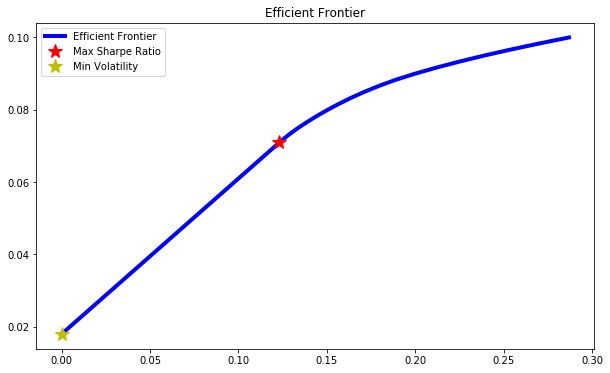

In [14]:
# Plot the Efficient Frontier with the max Sharpe Ratio
# and minimum volatility marked
plt.figure(figsize=(10,6))
plt.plot(target_volatility,target_returns,'b',lw=4.0,
         label='Efficient Frontier')
plt.plot(max_sharpe_ratio_volatility, max_sharpe_ratio_return, 
         'r*', markersize=15.0, label='Max Sharpe Ratio')
plt.plot(min_volatility, min_volatility_return, 'y*', 
         markersize=15.0, label='Min Volatility')
plt.legend(loc="best")
plt.title(label='Efficient Frontier')

In [15]:
# Select the stocks at the max Sharpe ratio
df_selected_stocks['Weights'] = weights_for_max_sharpe_ratio.round(5)
df_selected_stocks

,Ticker,Name,Dvd Yld,Change,DY rank,Change Rank,total rank,beta,Expected_Return,Weights
0,ATVI,ACTIVISION BLIZZARD INC,2.010505,1.533731,223,57,280,0.851930,0.069116,0.00000
1,AVGO,BROADCOM INC,3.069135,2.039234,116,30,146,0.979600,0.076776,0.00000
2,BA,BOEING CO/THE,2.322856,1.678239,194,48,242,0.982430,0.076946,0.00000
3,BBY,BEST BUY CO INC,2.376600,1.302835,187,82,269,1.097770,0.083866,0.02505
4,CCI,CROWN CASTLE INTL CORP,3.322014,0.708843,94,197,291,0.684991,0.059099,0.07029
5,CME,CME GROUP INC,2.281996,1.320938,199,74,273,0.586603,0.053196,0.00000
6,CTAS,CINTAS CORP,1.600187,2.507461,284,19,303,0.960328,0.075620,0.04924
7,DLR,DIGITAL REALTY TRUST INC,3.590437,0.724253,78,191,269,0.699076,0.059945,0.00842
8,DRI,DARDEN RESTAURANTS INC,2.612034,1.286819,158,83,241,0.772788,0.064367,0.03351
9,EXR,EXTRA SPACE STORAGE INC,3.274419,0.808546,96,173,269,0.515145,0.048909,0.00000


In [16]:
# Get the recommended portfolio of stocks
df_portfolio = df_selected_stocks[df_selected_stocks['Weights'] != 0]
print('The recommended portfolio has {} stocks.  They are:'. \
      format(len(df_portfolio)))
df_portfolio

The recommended portfolio has 18 stocks.  They are:


,Ticker,Name,Dvd Yld,Change,DY rank,Change Rank,total rank,beta,Expected_Return,Weights
3,BBY,BEST BUY CO INC,2.376600,1.302835,187,82,269,1.097770,0.083866,0.02505
4,CCI,CROWN CASTLE INTL CORP,3.322014,0.708843,94,197,291,0.684991,0.059099,0.07029
6,CTAS,CINTAS CORP,1.600187,2.507461,284,19,303,0.960328,0.075620,0.04924
7,DLR,DIGITAL REALTY TRUST INC,3.590437,0.724253,78,191,269,0.699076,0.059945,0.00842
8,DRI,DARDEN RESTAURANTS INC,2.612034,1.286819,158,83,241,0.772788,0.064367,0.03351
10,HD,HOME DEPOT INC,2.384730,1.150542,186,101,287,0.997953,0.077877,0.10799
11,JPM,JPMORGAN CHASE & CO,2.443721,1.153748,181,99,280,1.069030,0.082142,0.13203
12,LRCX,LAM RESEARCH CORP,1.649003,2.201186,275,25,300,1.425520,0.103531,0.03377
13,MAA,MID-AMERICA APARTMENT COMM,2.848876,0.873124,137,158,295,0.627210,0.055633,0.01448
14,MCD,MCDONALD'S CORP,3.015101,1.028346,120,122,242,0.705461,0.060328,0.09618


In [17]:
weighted_average_dividend_yield = \
    np.sum(df_selected_stocks['Dvd Yld'] * df_selected_stocks['Weights'])
print('Weighted average dividend yield: {}%'. \
      format(weighted_average_dividend_yield.round(2)))

Weighted average dividend yield: 2.9%


# Write a clear report summarizing what you did and how you arrived at your answer.  Be sure to briefly describe how you chose the initial stocks that you included and any other assumptions that you made such as the amount of historical data you used.  Your report should summarize the parameter estimates that you found and should show your efficient frontier plots.  Submit your data and all accompanying spread sheets.{-}

Discussed above